<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/diabetes_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Preprocessing**

**Importing Depedencies**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

**Load the Data**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predictive_Data/dataset_diabetes/diabetic_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
data.shape

(101766, 50)

In [7]:
data['admission_type_id'] = data['admission_type_id'].astype(str)

Our dataset has 101,766 rows and 50 columns. Each row represents a unique hospital admission. Columns represent patient demographics, medical details, and admission-specific information such as length of stay (time_in_hospital). We can see a list of all columns by applying .columns to our dataframe.

In [8]:
print(f"Columns: {data.columns.tolist()}")

Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


Looking at the columns, we can see that a large proportion are medication names. Let’s store these column names as a separate list, which we’ll get back to in a bit.

In [9]:
medications = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

print(f"There are {len(medications)} medications represented as columns in the dataset.")

There are 23 medications represented as columns in the dataset.


How many hospital admissions and unique patients are in the dataset?

In [10]:
n_admissions = data['encounter_id'].nunique()
n_patients = data['patient_nbr'].nunique()

print(f"Number of hospital admissions: {n_admissions:,}")
print(f"Number of unique patients: {n_patients:,}")

Number of hospital admissions: 101,766
Number of unique patients: 71,518


How many patients have had more than one hospital admission?

In [11]:
admissions_per_patient = data['patient_nbr'].value_counts().reset_index()
admissions_per_patient.columns = ['patient_nbr', 'count']
multiple_admissions = admissions_per_patient[admissions_per_patient['count'] > 1]

In [12]:
print(f"Proportion of patients that have multiple admissions: {multiple_admissions['patient_nbr'].nunique()/n_patients:.2%}")
print(f"Maximum number of admissions for a given patient: {multiple_admissions['count'].max()}")

Proportion of patients that have multiple admissions: 23.45%
Maximum number of admissions for a given patient: 40


**Data Cleaning**

In [13]:
admission_type = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Predictive_Data/dataset_diabetes/IDs_mapping.csv")
admission_type.dtypes

admission_type_id    object
description          object
dtype: object

In [14]:
missing_values = ['nan', 'Not Available', 'Not Mapped']
admission_type['description'] = admission_type['description'].replace(missing_values, np.nan)

In [15]:
admission_type.columns = ['admission_type_id', 'admission_type']

In [16]:
data = data.merge(admission_type, on='admission_type_id')

In [17]:
data['admission_type'].value_counts()

Discharged to home                                                      53990
Emergency                                                               53990
 Physician Referral                                                     53990
Elective                                                                18869
Discharged/transferred to SNF                                           18869
HMO Referral                                                            18869
Urgent                                                                  18480
Clinic Referral                                                         18480
Discharged/transferred to another short term hospital                   18480
Discharged/transferred to home with home health service                  5291
 Transfer from another health care facility                              5291
 Transfer from a Skilled Nursing Facility (SNF)                          4785
Discharged/transferred to another type of inpatient care institu

Now that we have a “clean” mapper, we can apply it to our dataset. We can map admission_type_id values in our original dataframe to the descriptors in our admission_type_mapper dictionary.

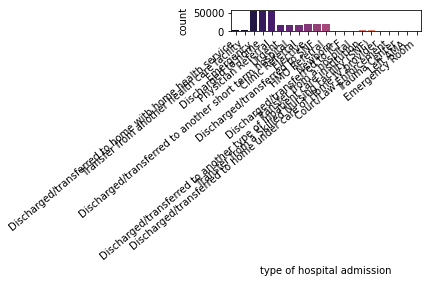

In [18]:
ax = sns.countplot(x='admission_type', data=data, palette='magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel('type of hospital admission')
plt.show()

Decoding Discharge Location

In [19]:
discharge_disposition = pd.read_csv("https://s3.us-east-2.amazonaws.com/explore.datasets/diabetes/id_mappers/discharge_disposition_id.csv")
discharge_disposition.sample(n=5, random_state=416)

,discharge_disposition_id,description
13,14,Hospice / medical facility
8,9,Admitted as an inpatient to this hospital
14,15,Discharged/transferred within this institution...
20,21,"Expired, place unknown. Medicaid only, hospice."
29,29,Discharged/transferred to a Critical Access Ho...


In [20]:
discharge_disposition['expired'] = discharge_disposition['description'].str.lower().str.contains('expired')

In [21]:
discharge_expired = discharge_disposition[discharge_disposition['expired']==True]
discharge_expired

,discharge_disposition_id,description,expired
10,11,Expired,True
18,19,"Expired at home. Medicaid only, hospice.",True
19,20,"Expired in a medical facility. Medicaid only, ...",True
20,21,"Expired, place unknown. Medicaid only, hospice.",True


In [22]:
expired_ids = discharge_expired['discharge_disposition_id'].tolist()
print(f"discharge_disposition_id's that indicate an expired patient: {expired_ids}")

discharge_disposition_id's that indicate an expired patient: [11, 19, 20, 21]


In [23]:
data = data[~data['discharge_disposition_id'].isin(expired_ids)]

In [24]:
n_patients_nonexpired = data['patient_nbr'].nunique()
print(f"Original number of patients: {n_patients:,}")
print(f"Number of expired patients: {n_patients-n_patients_nonexpired:,}")
print(f"After filtering out expired patients: {n_patients_nonexpired:,}")

Original number of patients: 71,518
Number of expired patients: 1,079
After filtering out expired patients: 70,439


In [25]:
data[medications[0]].value_counts()

No        240648
Steady     54768
Up          3201
Down        1725
Name: metformin, dtype: int64

In [26]:
for m in medications:
    data[f'{m}_bool'] = np.where(data[m]=='No', 0, 1)
    data = data.drop(columns=m)


In [27]:
prevalence = []

for m in medications:
    patient_meds = data.groupby('patient_nbr')[f'{m}_bool'].sum().reset_index()
    patient_meds[f'{m}_bool'] = patient_meds[f'{m}_bool'].astype(bool)
    n_patients_on_med = patient_meds[f'{m}_bool'].sum()
    proportion = n_patients_on_med/n_patients
    prevalence.append(proportion)


In [28]:
medication_counts = pd.DataFrame({'medication': medications, 'prevalence':prevalence})
medication_counts = medication_counts.sort_values(by='prevalence', ascending=False)
medication_counts.head()

,medication,prevalence
17,insulin,0.543779
0,metformin,0.229523
6,glipizide,0.138916
7,glyburide,0.118851
9,pioglitazone,0.082525


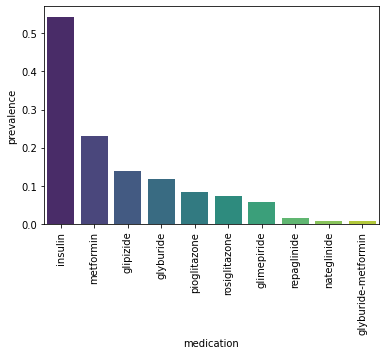

In [29]:
sns.barplot(x='medication', y='prevalence', data=medication_counts.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [30]:
import json
import requests

def get_mesh_from_drug_name(drug_name):
    drug_name = drug_name.strip()
    rxclass_list = []
    try:
        r = requests.get(f"https://rxnav.nlm.nih.gov/REST/rxclass/class/byDrugName.json?drugName={drug_name}&relaSource=MESH")
        response = r.json()
        all_concepts = response['rxclassDrugInfoList']['rxclassDrugInfo']
        for i in all_concepts:
            rxclass_list.append(i['rxclassMinConceptItem']['className'])
    except:
        pass
    return list(set(rxclass_list))

In [31]:
top_ten_meds = medication_counts.head(10)['medication'].tolist()

med_mesh_descriptors = dict()
for m in top_ten_meds:
    med_mesh_descriptors[m] = get_mesh_from_drug_name(m)

In [32]:
med_mesh_descriptors

{'glimepiride': ['Anti-Arrhythmia Agents',
  'Immunosuppressive Agents',
  'Hypoglycemic Agents'],
 'glipizide': ['Hypoglycemic Agents'],
 'glyburide': ['Hypoglycemic Agents'],
 'glyburide-metformin': ['Hypoglycemic Agents'],
 'insulin': [],
 'metformin': ['Hypoglycemic Agents'],
 'nateglinide': ['Hypoglycemic Agents'],
 'pioglitazone': ['Hypoglycemic Agents'],
 'repaglinide': ['Hypoglycemic Agents'],
 'rosiglitazone': ['Hypoglycemic Agents']}

Creating a Target Variable

In [33]:
data['readmitted'].value_counts()

NO     159636
>30    106635
<30     34071
Name: readmitted, dtype: int64

In [34]:
data['readmitted_bool'] = np.where(data['readmitted']=='NO', 0, 1)
data['readmitted_bool'].value_counts()

0    159636
1    140706
Name: readmitted_bool, dtype: int64

**Data Exploration and Visualization**

Assessing Missing Values

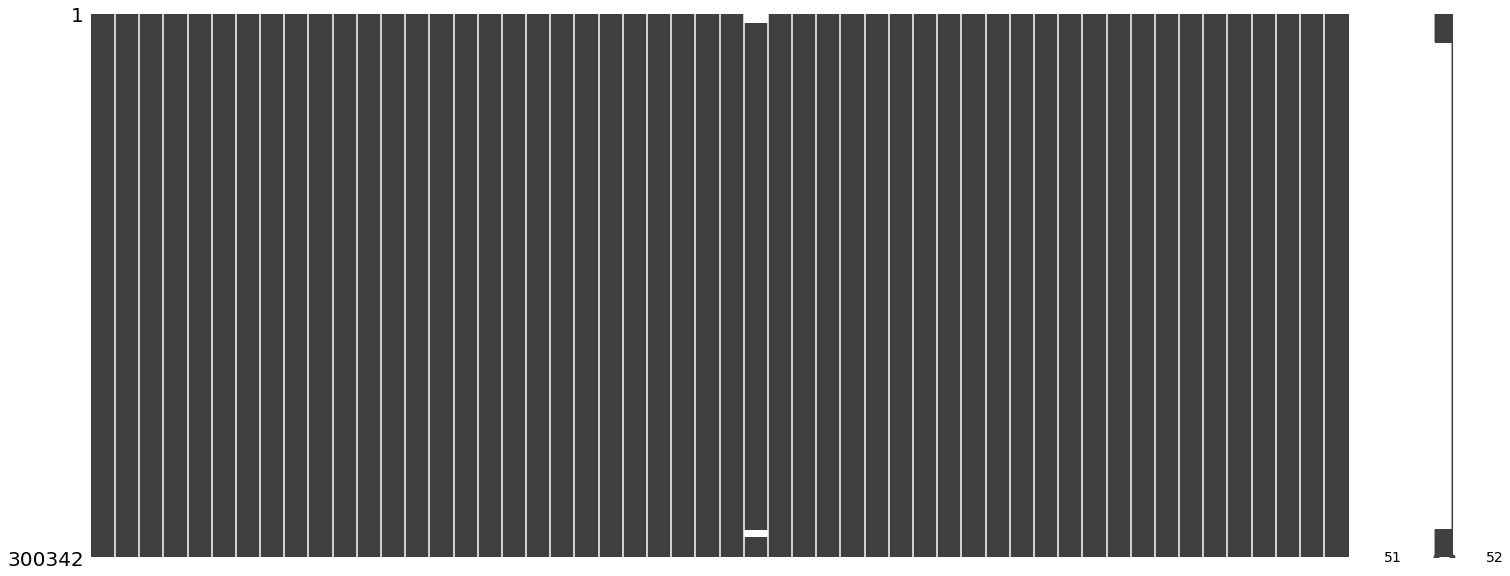

In [35]:
import missingno as msno

msno.matrix(data)

Patient Demographics: Age and Gender

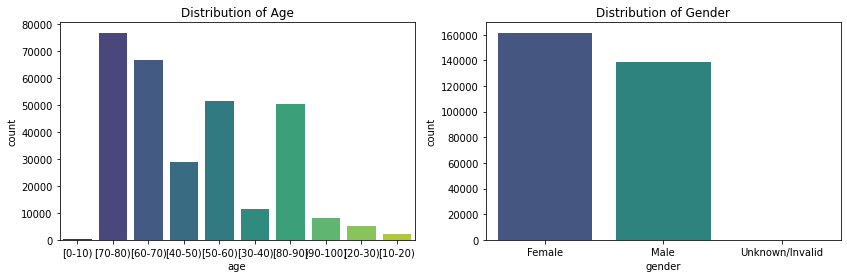

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='age', data=data, palette='viridis')
plt.title("Distribution of Age")

plt.subplot(1,2,2)
sns.countplot(data['gender'], palette='viridis')
plt.title("Distribution of Gender")
plt.show()

In [37]:
data['gender'].value_counts(normalize=True)

Female             0.537997
Male               0.461973
Unknown/Invalid    0.000030
Name: gender, dtype: float64

How long were hospital stays for a given admission?

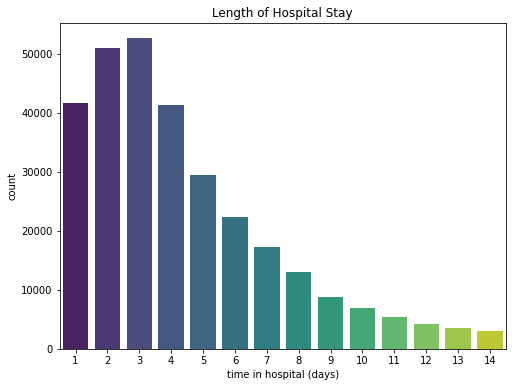

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data['time_in_hospital'], palette='viridis')
plt.xlabel("time in hospital (days)")
plt.title("Length of Hospital Stay")
plt.show()

In [39]:
print(f"Mean time in hospital: {data['time_in_hospital'].mean():.2f}")

Mean time in hospital: 4.39


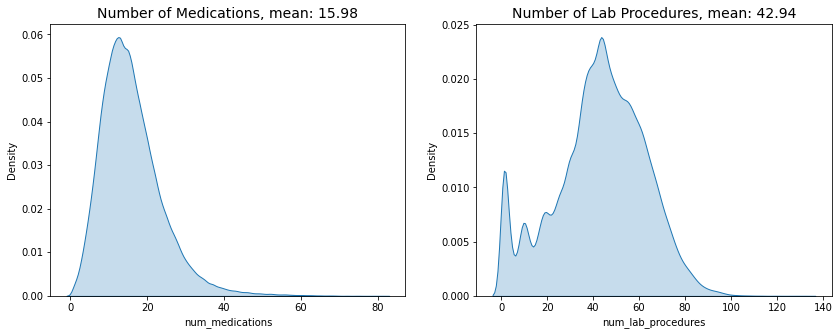

In [40]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.kdeplot(data['num_medications'], shade=True, legend=False)
plt.title(f"Number of Medications, mean: {data['num_medications'].mean():.2f}", size=14)

plt.subplot(1,2,2)
sns.kdeplot(data['num_lab_procedures'], shade=True, legend=False)
plt.title(f"Number of Lab Procedures, mean: {data['num_lab_procedures'].mean():.2f}", size=14)
plt.show()

What was the most common medical specialty?

In [41]:
medical_specialties = data['medical_specialty'].value_counts().reset_index()
medical_specialties.columns = ['specialty', 'count']
medical_specialties['prevalence'] = medical_specialties['count']/len(data)
print(f"There are {data['medical_specialty'].nunique()} medical specialties.")
medical_specialties.head(10)

There are 73 medical specialties.


,specialty,count,prevalence
0,?,147387,0.490731
1,InternalMedicine,42984,0.143117
2,Emergency/Trauma,22347,0.074405
3,Family/GeneralPractice,21906,0.072937
4,Cardiology,15888,0.052900
5,Surgery-General,9204,0.030645
6,Nephrology,4632,0.015422
7,Orthopedics,4182,0.013924
8,Orthopedics-Reconstructive,3693,0.012296
9,Radiologist,3387,0.011277


What proportion of patients were on diabetes medication during their hospital stay?

In [42]:
data['diabetesMed'].value_counts(normalize=True)

Yes    0.77184
No     0.22816
Name: diabetesMed, dtype: float64

Do patients have normal A1C levels?

In [43]:
data['A1Cresult'].value_counts(normalize=True)

None    0.831432
>8      0.081417
Norm    0.049354
>7      0.037797
Name: A1Cresult, dtype: float64

In [44]:
print(f"Proportion of hospital admissions with missing A1C result: {data['A1Cresult'].isna().sum()/len(data):.2%}")



Proportion of hospital admissions with missing A1C result: 0.00%


**Feature Selection and Engineering**

One-hot Encoding

In [45]:
categorical = ['race', 'admission_type']

for c in categorical:
    data = pd.concat([data, pd.get_dummies(data[c], prefix=c)], axis=1)
    data.drop(columns=c)

In [46]:
data['age'].value_counts()

[70-80)     76686
[60-70)     66555
[50-60)     51306
[80-90)     50118
[40-50)     28878
[30-40)     11295
[90-100)     8004
[20-30)      4950
[10-20)      2070
[0-10)        480
Name: age, dtype: int64

Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data['age_label'] = label_encoder.fit_transform(data['age'])
data['gender_bool'] = label_encoder.fit_transform(data['gender'].astype(str))


**Data Modelling**

Defining the X and y Variables

In [48]:
med_features = ['metformin_bool', 'repaglinide_bool',
    'nateglinide_bool', 'chlorpropamide_bool', 'glimepiride_bool',
    'acetohexamide_bool', 'glipizide_bool', 'glyburide_bool',
    'tolbutamide_bool', 'pioglitazone_bool', 'rosiglitazone_bool',
    'acarbose_bool', 'miglitol_bool', 'troglitazone_bool',
    'tolazamide_bool', 'examide_bool', 'citoglipton_bool', 'insulin_bool',
    'glyburide-metformin_bool', 'glipizide-metformin_bool',
    'glimepiride-pioglitazone_bool', 'metformin-rosiglitazone_bool',
    'metformin-pioglitazone_bool']

demographic_features = ['race_AfricanAmerican', 'race_Asian',
    'race_Caucasian', 'race_Hispanic', 'race_Other', 'age_label',
    'admission_type_Elective', 'admission_type_Newborn',
    'admission_type_Trauma Center', 'admission_type_Urgent', 'gender_bool']

other_features = ['num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']

all_features = med_features + demographic_features + other_features

X = data[all_features]
y = data['readmitted_bool']

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# RandomForestClassifier().get_params()
from sklearn import svm
clf = svm.SVC(kernel='linear',random_state=42)
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

search_space = {
    'n_estimators': [5,10,50],
    'max_depth': [3,5,10]
}

rfc = RandomForestClassifier(random_state=42)

In [54]:
grid_search = GridSearchCV(rfc, search_space, cv=3)

In [55]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [56]:
print(f"Optimal hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.3f}")

Optimal hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Best score: 0.620


In [57]:
results = pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,6.771274,0.137264,0.542796,0.009113,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.609805,0.631890,0.617047,0.619580,0.009192,1
5,4.121354,0.031063,0.341066,0.002075,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.605909,0.634706,0.614789,0.618468,0.012041,2
7,1.401829,0.012792,0.133992,0.001333,10,10,"{'max_depth': 10, 'n_estimators': 10}",0.605759,0.631360,0.610454,0.615858,0.011128,3
2,2.978233,0.069401,0.290327,0.003286,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.600126,0.628893,0.614310,0.614443,0.011745,4
4,0.883044,0.013075,0.097582,0.005093,5,10,"{'max_depth': 5, 'n_estimators': 10}",0.600965,0.631260,0.604091,0.612106,0.013605,5


In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

search_space = {
    "n_estimators": randint(10,100),
    "max_depth": randint(1, 11)
}

random_search = RandomizedSearchCV(rfc, param_distributions=search_space, n_iter=9, cv=3)
random_search.fit(X,y)

print(f"Optimal hyperparameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_:.3f}")

Optimal hyperparameters: {'max_depth': 6, 'n_estimators': 50}
Best score: 0.621


In [63]:
results = pd.DataFrame(random_search.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,5.329833,0.456786,0.392116,0.027255,6,50,"{'max_depth': 6, 'n_estimators': 50}",0.608336,0.635436,0.618305,0.620692,0.011191,1
8,5.635434,0.091322,0.459238,0.004103,10,42,"{'max_depth': 10, 'n_estimators': 42}",0.610314,0.632239,0.617666,0.620073,0.009111,2
5,4.980655,0.107770,0.388236,0.004158,7,47,"{'max_depth': 7, 'n_estimators': 47}",0.608217,0.635046,0.616347,0.619870,0.011233,3
3,5.316387,0.124918,0.411056,0.010043,8,45,"{'max_depth': 8, 'n_estimators': 45}",0.607737,0.633408,0.616967,0.619371,0.010617,4
1,6.635734,0.088954,0.538824,0.000530,5,82,"{'max_depth': 5, 'n_estimators': 82}",0.605190,0.634277,0.615748,0.618405,0.012022,5


**Evaluating Model Performance**

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier(**random_search.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
accuracy = rfc.score(X_test, y_test)

print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.626


In [66]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred = rfc.predict(X_test)

precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

Precision: 0.632
Recall: 0.471


Text(33.0, 0.5, 'actual')

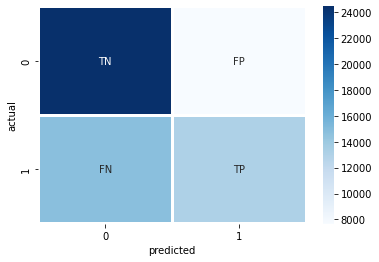

In [67]:
confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = np.array([['TN','FP'],['FN','TP']])

sns.heatmap(confusion,annot=labels, fmt='', linewidths=2, cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")

In [68]:
feature_importances = {
    'features': list(X.columns.values),
    'importance': list(rfc.feature_importances_)
}

important_features = pd.DataFrame(feature_importances)
important_features.sort_values(by='importance', ascending=False).head(15)

,features,importance
39,number_inpatient,0.486821
38,number_emergency,0.149504
40,number_diagnoses,0.110958
37,number_outpatient,0.085357
36,num_medications,0.046052
28,age_label,0.026627
34,num_lab_procedures,0.022953
35,num_procedures,0.019990
17,insulin_bool,0.014735
0,metformin_bool,0.006561
